In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from utils import *

In [14]:
# Note; 2013-2014 file has dates formatted differently.
# To account for this we apply pd_datetime to each year's data individually below.
FILE_YEAR_RANGES = ['2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021_2022', '2022_2023']

DATA_DIRECTORY = 'external/USGS/Alaska Science Center/gulfWatch_intertidalTemperature'

loaded_dataframes = []
for year_range in FILE_YEAR_RANGES:
  file_name = f'{DATA_DIRECTORY}/Block04_KBAY/Intertidal_Temperature_KBAY_{year_range}.csv'
  year_df = pd.read_csv(file_name)
  year_df['dt'] = pd.to_datetime(year_df['date'] + ' ' + year_df['time'])
  loaded_dataframes.append(year_df)
df = pd.concat(loaded_dataframes)

# I think this should be Anchorage but I was having issues with daylight savings time
index = pd.DatetimeIndex(df['dt']).tz_localize('UTC')
df.set_index(index, inplace=True)
df.sort_index(inplace=True)

df.drop(['date','dt','time'], axis=1, inplace=True) # these are represented by the index now, unneeded
df.info()

In [23]:
def plot_temperatures(data):
  plt.figure(figsize=(40, 8))
  plt.plot(data.index, data,label="Temperature", color='blue')
  plt.xlim(data.index[0], data.index[-1])

  plt.title('Recorded Intertidal Temperature')
  plt.xlabel('Date and Time')
  plt.ylabel('Temperature (°C)')
  plt.xticks(rotation=45)
  plt.legend()
  plt.tight_layout()
  plt.show()

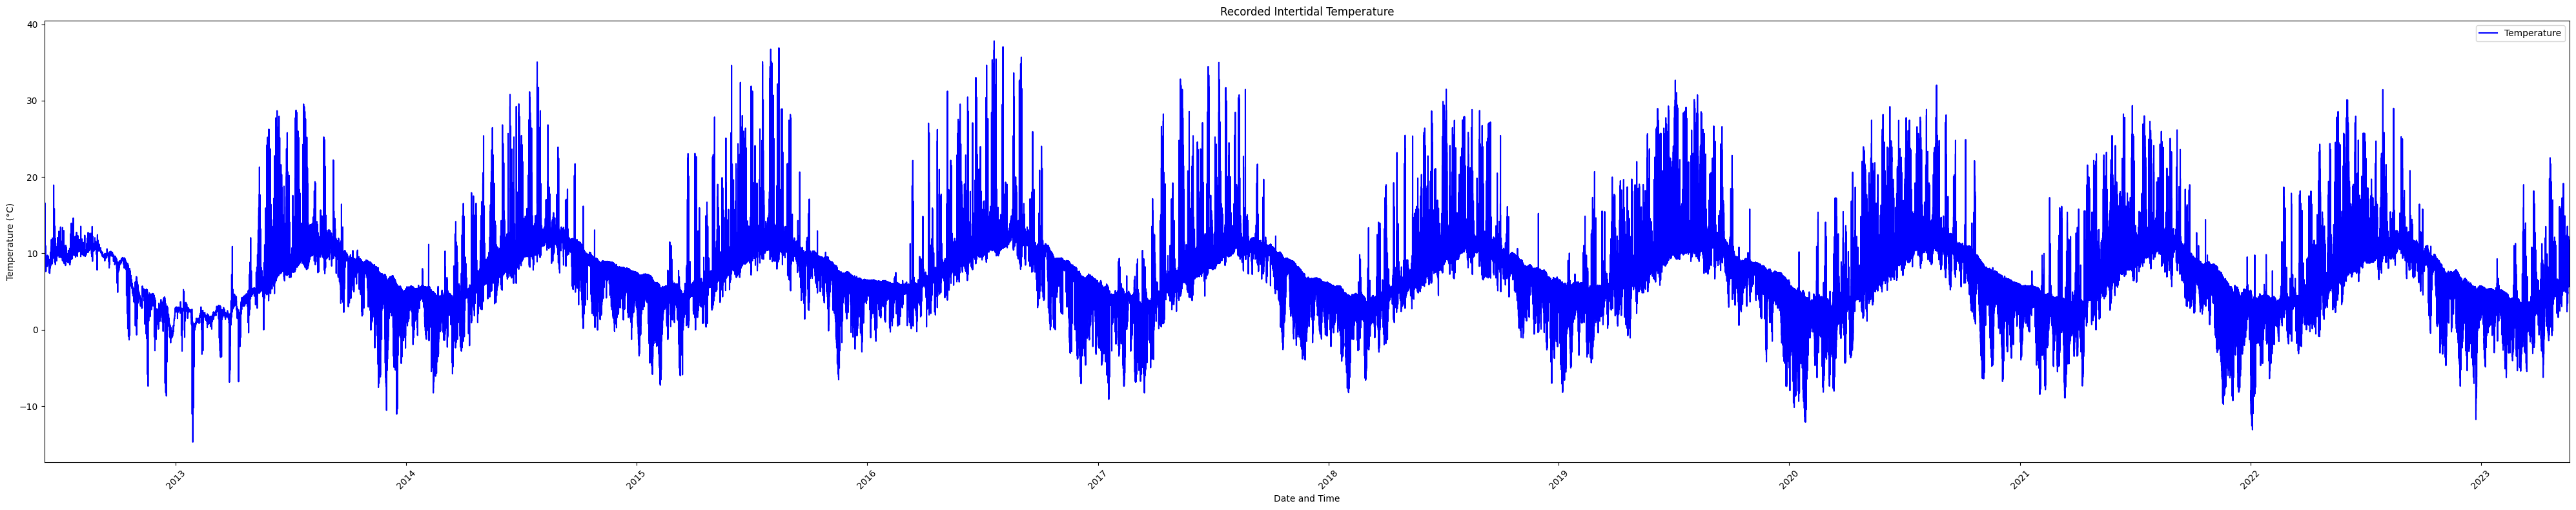

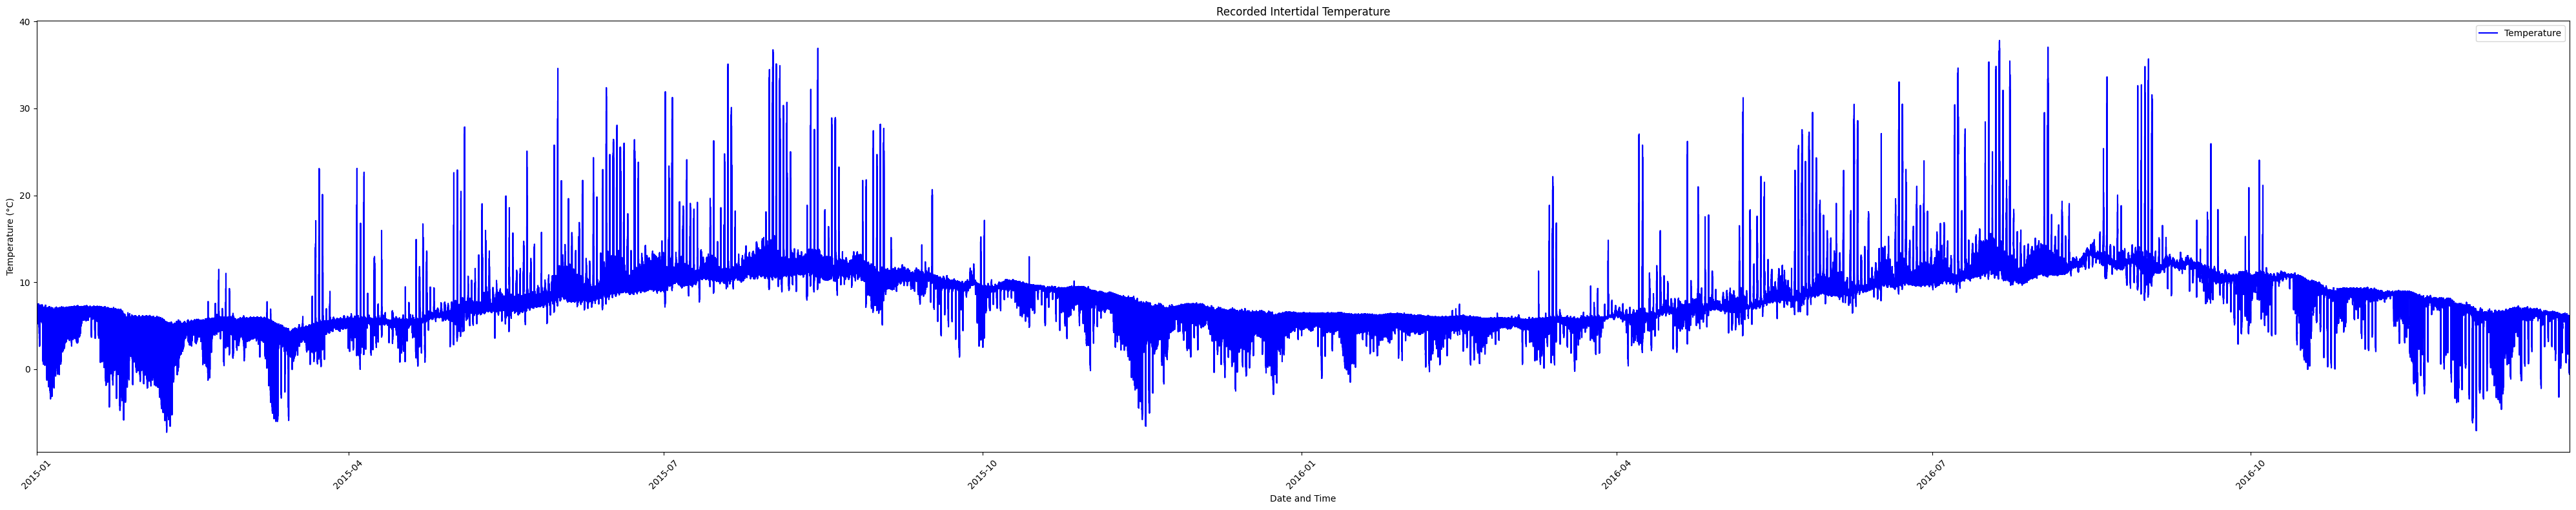

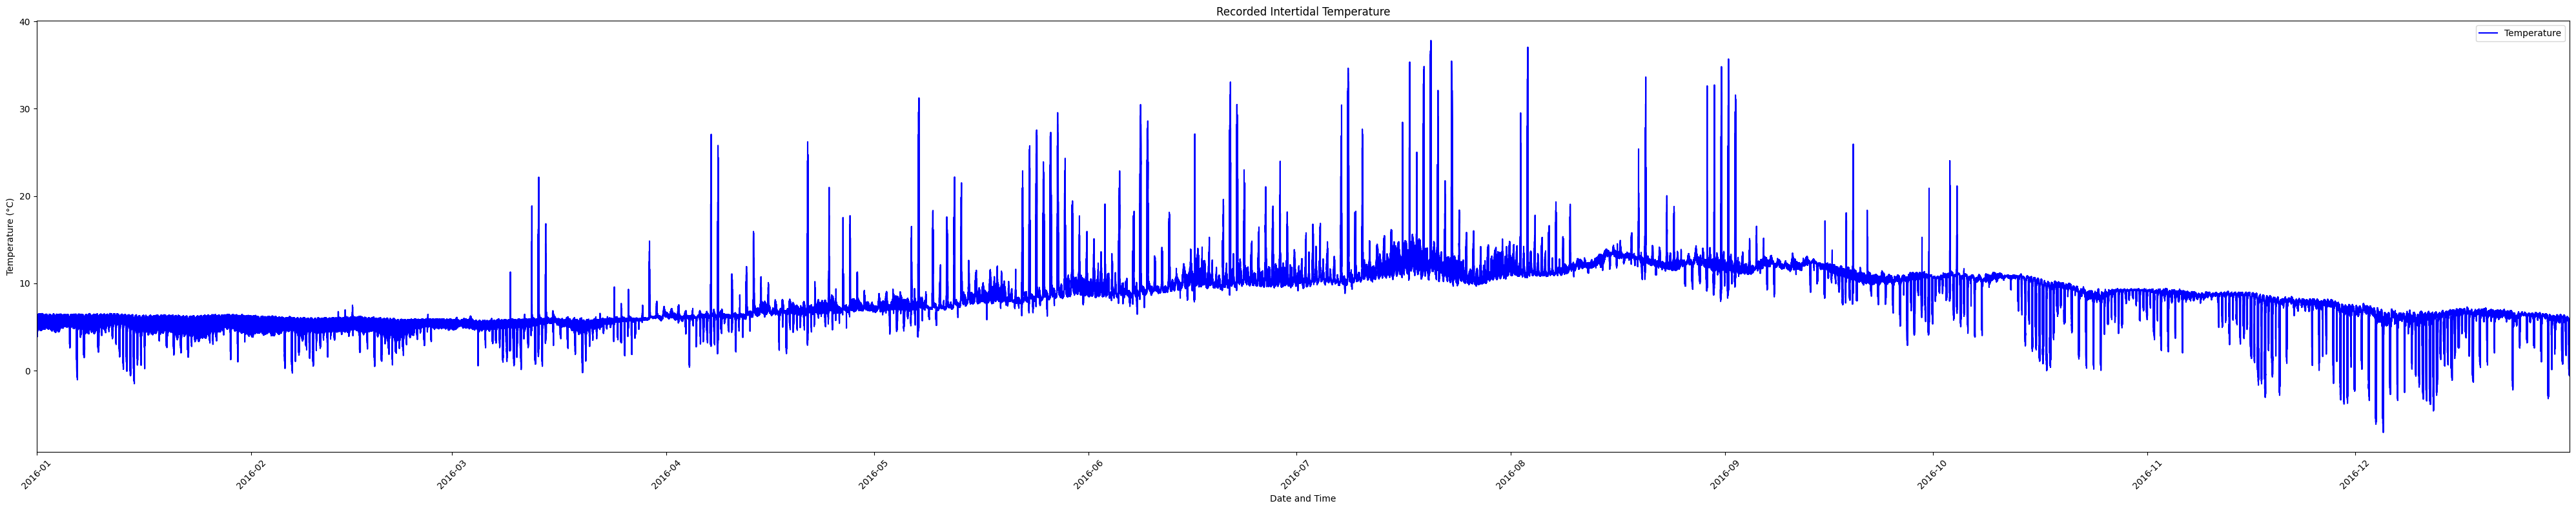

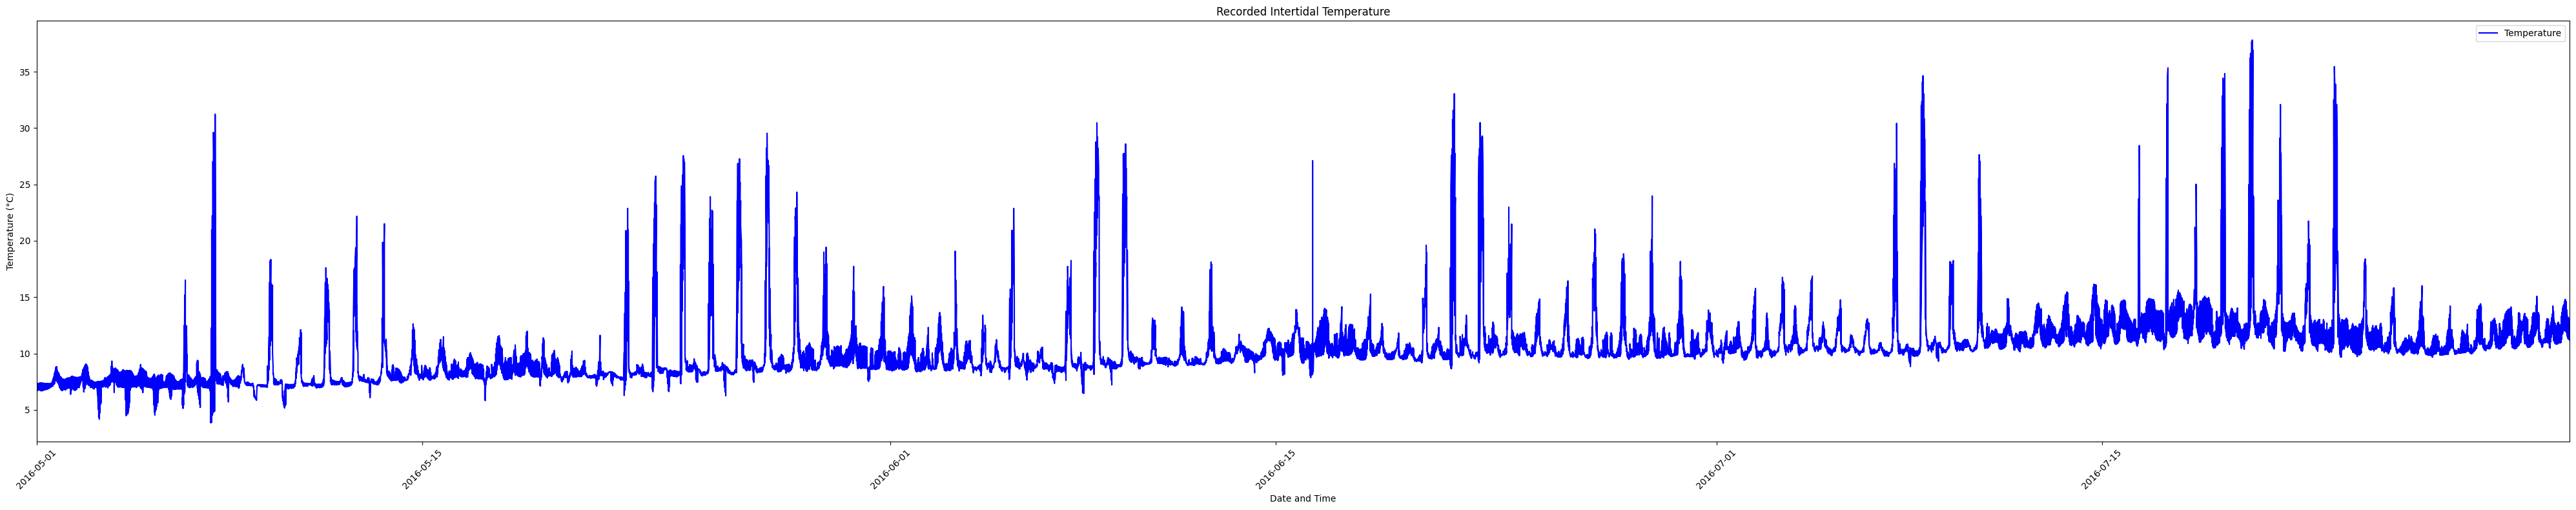

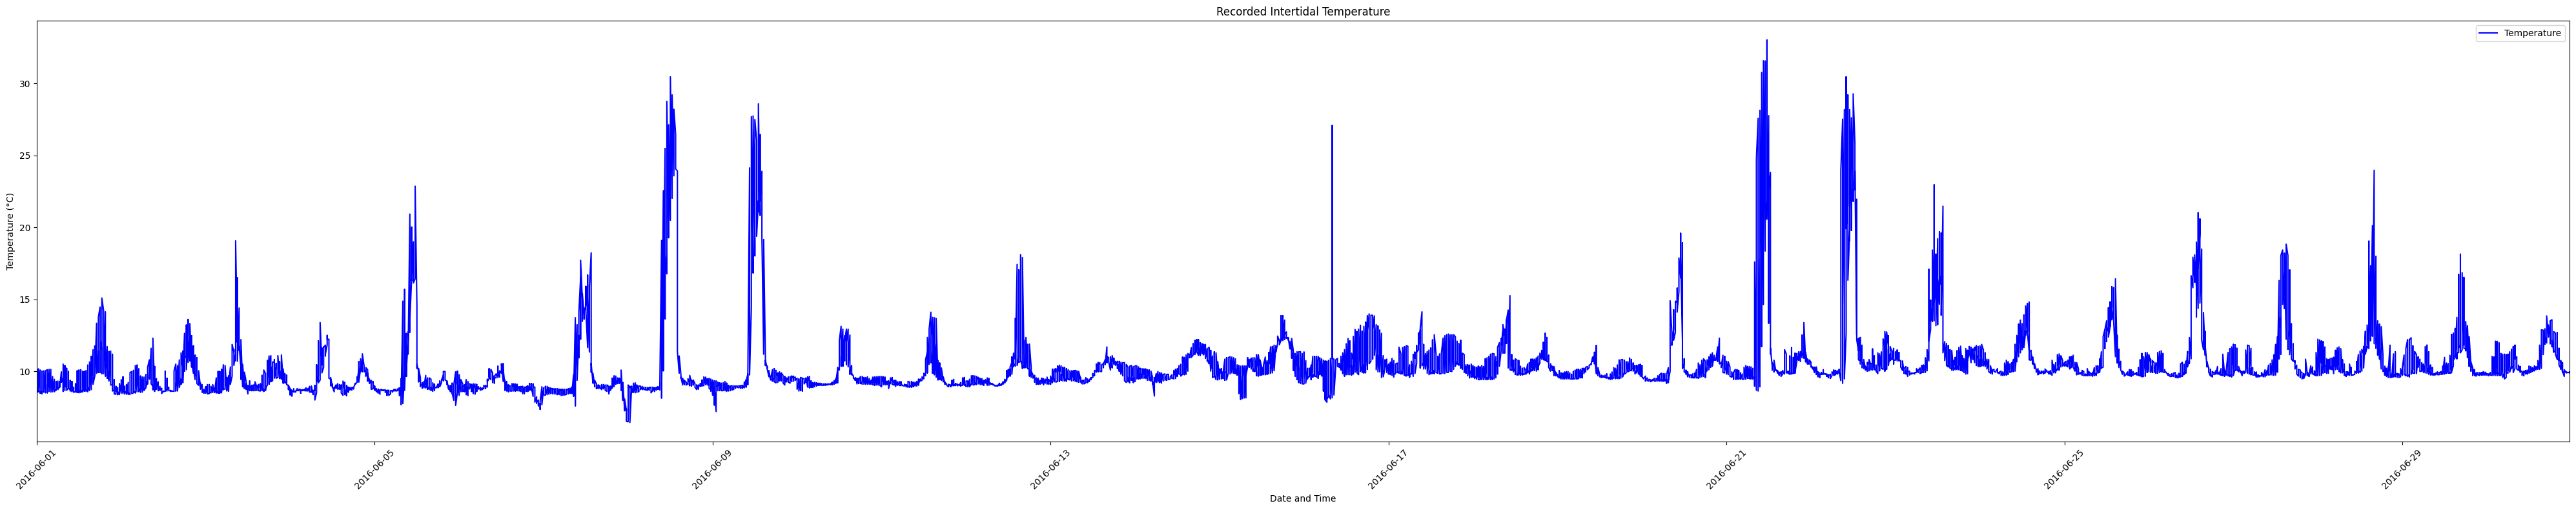

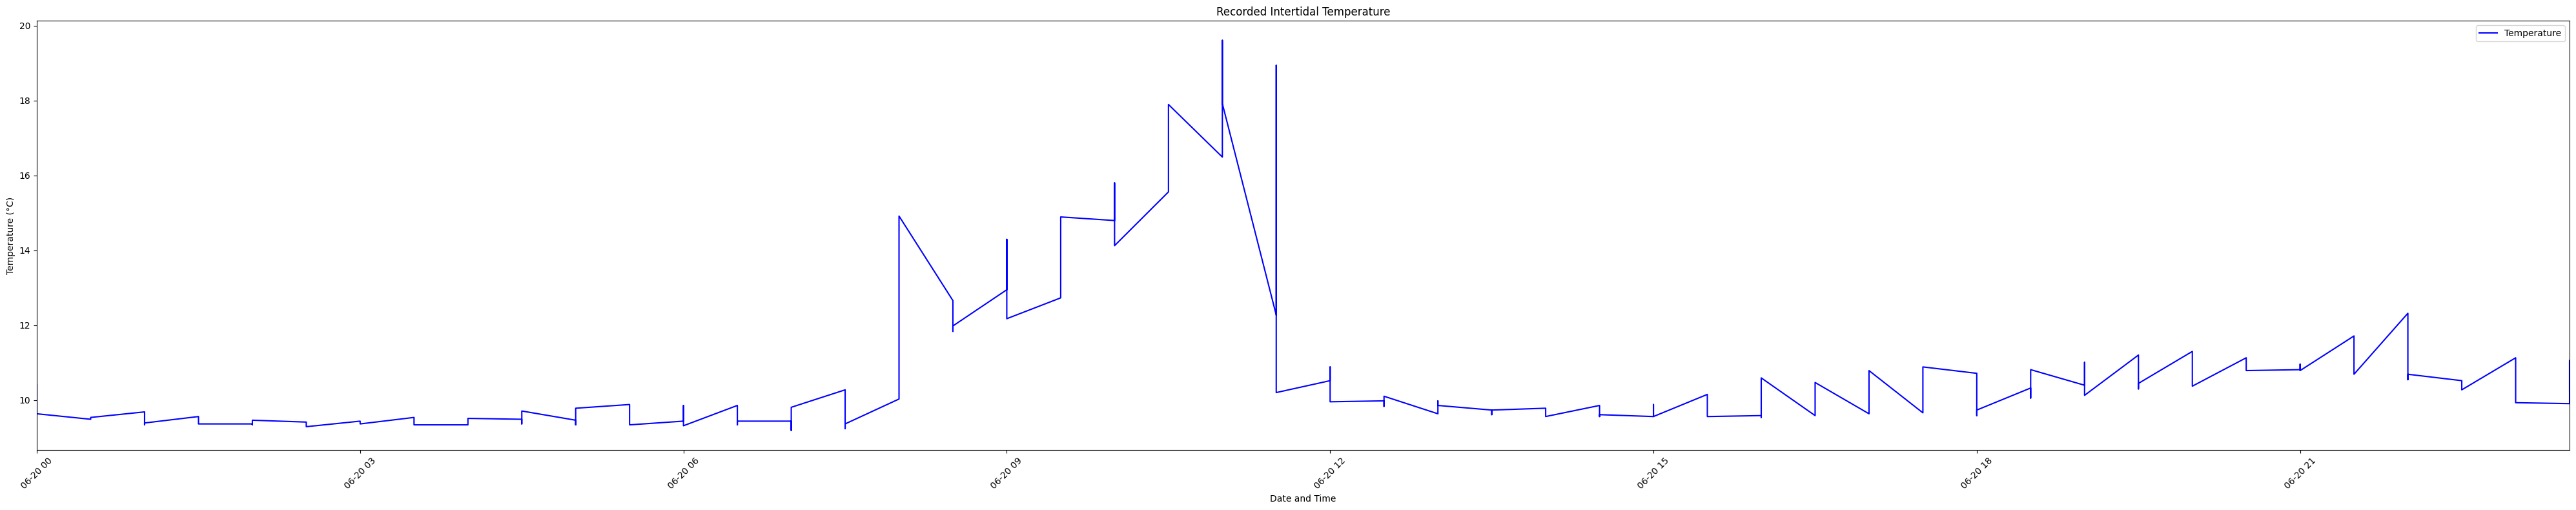

In [25]:
all_years = df['temperature']
data_ranges = [all_years, all_years['2015':'2016'], all_years['2016'], all_years['2016-05':'2016-07'], all_years['2016-06'], all_years['2016-06-20']]

for data_range in data_ranges:
  plot_temperatures(data_range)